# NumPy &amp; Keras

Based on *Deep Learning with Python*, F. Chollet, 2018, Sections 2.1-2.2. See: [https://github.com/fchollet/deep-learning-with-python-notebooks](https://github.com/fchollet/deep-learning-with-python-notebooks)

[NumPy](http://www.numpy.org/) is a ubiquitous numerical processing library.

[MNIST](https://en.wikipedia.org/wiki/MNIST_database) is a classic machine learning dataset.

[Keras](https://keras.io/) has convenient tools for dataset management.

In [1]:
import numpy as np

NumPy supports n-dimensional tensors.

In [2]:
scalar = np.array(42)
one_d = np.array([1, 2, 3])
two_d = np.array([[1, 2, 3], [4, 5, 6]])
three_d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

print(
    f'scalar tensor (axes: {scalar.ndim}; shape: {scalar.shape}): \n{scalar}\n\n',
    f'1D tensor (axes: {one_d.ndim}; shape: {one_d.shape}): \n{one_d}\n\n',
    f'2D tensor (axes: {two_d.ndim}; shape: {two_d.shape}): \n{two_d}\n\n',
    f'3D tensor (axes: {three_d.ndim}; shape: {three_d.shape}): \n{three_d}\n\n'
)

scalar tensor (axes: 0; shape: ()): 
42

 1D tensor (axes: 1; shape: (3,)): 
[1 2 3]

 2D tensor (axes: 2; shape: (2, 3)): 
[[1 2 3]
 [4 5 6]]

 3D tensor (axes: 3; shape: (2, 2, 3)): 
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]




In [3]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "C:\pythonVenv\cs344\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\pythonVenv\cs344\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\pythonVenv\cs344\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Python36\lib\imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Python36\lib\imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: The specified module could not be found.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

The MNIST dataset contains 70K images. Each image is a hand-written digit with 28x28-pixel resolution. 

In [28]:
def print_structures():
    print(
        f'training images \
            \n\tcount: {len(train_images)} \
            \n\tdimensions: {train_images.ndim} \
            \n\tshape: {train_images.shape} \
            \n\tdata type: {train_images.dtype}\n\n',
        f'testing images \
            \n\tcount: {len(test_labels)} \
            \n\tdimensions: {train_labels.ndim} \
            \n\tshape: {test_labels.shape} \
            \n\tdata type: {test_labels.dtype} \
            \n\tvalues: {test_labels}\n',
    )
print_structures()

training images             
	count: 60000             
	dimensions: 3             
	shape: (60000, 28, 28)             
	data type: uint8

 testing images             
	count: 10000             
	dimensions: 1             
	shape: (10000,)             
	data type: uint8             
	values: [7 2 1 ... 4 5 6]



Images look like this.

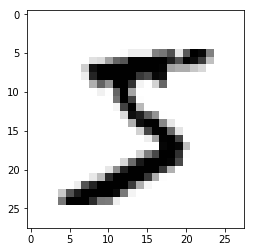

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

digit_image = train_images[0]
plt.imshow(digit_image, cmap=plt.cm.binary)

These image representations must be massaged to work with an ML system.

In [30]:
from keras.utils import to_categorical

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') /255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print_structures()

training images             
	count: 60000             
	dimensions: 2             
	shape: (60000, 784)             
	data type: float32

 testing images             
	count: 10000             
	dimensions: 2             
	shape: (10000, 10)             
	data type: float32             
	values: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

